In [1]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202011/scripts/trials/SA


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append(os.path.join('..', '..', 'functions'))

In [4]:
#!pip install dwave-neal

In [5]:
import Neal_exact_test_functions as net
import pandas as pd
import numpy as np
import timeit

In [6]:
df = pd.read_csv('../../../input/ost20.csv', sep=',')
print('20 bit datasets t_list:', net.calc_marginals(df))

20 bit datasets t_list: [11  9  5]


In [7]:
t1 = np.dot(df['Y'], df['LI'])
print('20 bit datasets t1 is {}'.format(t1))

20 bit datasets t1 is 8


In [8]:
2**20

1048576

### 10000 num_reads

In [19]:
num_reads = 10000
res = net.make_res_data(df, num_reads)

In [20]:
valid_y_list, valid_y_num, occurrence_list = net.find_valid_y(res)

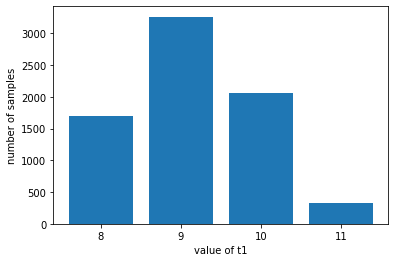

In [21]:
hist_dic = net.y_num_hist(df, valid_y_list, path='../../../output/SA/20bit/nealSA_20bit_10000numreads')

In [22]:
hist_dic

{9: 3261, 10: 2066, 8: 1694, 11: 323}

In [23]:
valid_y_num

7344

In [24]:
valid_y_list

[[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1],
 [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1],
 [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,

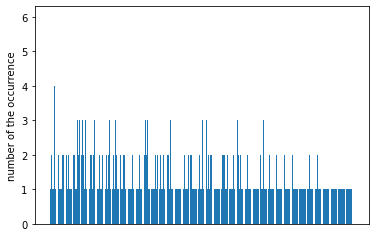

In [25]:
plot_path = '../../../output/SA/20bit/nealSA_20bit_10000numreads_occurance_hist'
net.occurence_hist(occurrence_list, plot_path)

In [27]:
loop = 10
result = timeit.timeit('net.find_valid_y(res)', globals=globals(), number=loop)
reads10000_time = result / loop
print(reads10000_time, '秒')

7.102387228400005 秒


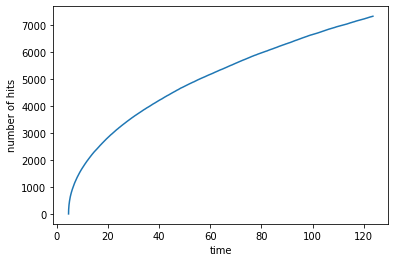

In [28]:
path='../../../output/SA/20bit/nealSA_20bit_10000numreads_num_time_transition'
valid_y_list, valid_y_num_list, time_list = net.time_num_y(df, num_reads, path)

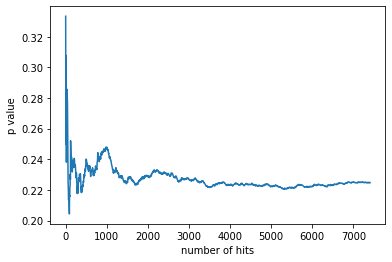

In [29]:
output_path='../../../output/SA/20bit/nealSA_20bit_10000numreads_p_value_transition'
valid_y_num, valid_y_list, p_dic = net.p_value_transition(df, num_reads, output_path)